#### Load the JSON data from Section 1

In [115]:
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.read_csv("data/processedheadlines.csv")

df.head(10)

,Unnamed: 0,headline,country,city
0,0,Zika Outbreak Hits Miami,NaN,Miami
1,1,Could Zika Reach New York City?,NaN,New York City
2,2,First Case of Zika in Miami Beach,NaN,Miami Beach
3,3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,4,Dallas man comes down with case of Zika,NaN,Dallas
5,5,Trinidad confirms first Zika case,NaN,Trinidad
6,6,Zika Concerns are Spreading in Houston,NaN,Houston
7,7,Geneve Scientists Battle to Find Cure,NaN,Geneve
8,8,The CDC in Atlanta is Growing Worried,NaN,Atlanta
9,9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo


In [116]:
len(df)

650

In [117]:
df = df.drop(columns='country')
df = df.dropna()

In [118]:
df.head(10)

,Unnamed: 0,headline,city
0,0,Zika Outbreak Hits Miami,Miami
1,1,Could Zika Reach New York City?,New York City
2,2,First Case of Zika in Miami Beach,Miami Beach
3,3,"Mystery Virus Spreads in Recife, Brazil",Recife
4,4,Dallas man comes down with case of Zika,Dallas
5,5,Trinidad confirms first Zika case,Trinidad
6,6,Zika Concerns are Spreading in Houston,Houston
7,7,Geneve Scientists Battle to Find Cure,Geneve
8,8,The CDC in Atlanta is Growing Worried,Atlanta
9,9,Zika Infested Monkeys in Sao Paulo,Sao Paulo


In [154]:
### setup a city dictionary to get the location and country code info since unicode sucks
### this list is already got the best city based on population selected so we can take
### it and run.
from unidecode import unidecode

city_dict = {}
cities = set()

for city in gc.get_cities().values():
    cities.add(city['name'])
    
for city in cities:
    best_city = list(max(gc.get_cities_by_name(city), key=lambda x: list(x.values())[0]['population']).values())[0]
    city_dict[unidecode(city)] = {
        'name': unidecode(best_city['name']),
        'latitude': best_city['latitude'],
        'longitude': best_city['longitude'],
        'countrycode': best_city['countrycode']
    }

In [156]:
### Get distinct list of cities
citylist = df.city.unique()
print(f"Found {len(citylist)} unique cities")

### loop through the city list and get the city with the largest population
### this will give us a distinct list for which to merge with.
citydata = []

for city in citylist:
    citydata.append([
        city_dict[city]['name'],
        city_dict[city]['latitude'],
        city_dict[city]['longitude'],
        city_dict[city]['countrycode']
    ])

cityinfo = pd.DataFrame(citydata, columns = ['city', 'latitude', 'longitude', 'countrycode'])
print(f"ended with {len(cityinfo)} unique cities")

Found 573 unique cities
ended with 573 unique cities


In [157]:
cityinfo.head(10)

,city,latitude,longitude,countrycode
0,Miami,25.77427,-80.19366,US
1,New York City,40.71427,-74.00597,US
2,Miami Beach,25.79065,-80.13005,US
3,Recife,-8.05389,-34.88111,BR
4,Dallas,32.78306,-96.80667,US
5,Trinidad,-14.83333,-64.90000,BO
6,Houston,29.76328,-95.36327,US
7,Geneve,46.20222,6.14569,CH
8,Atlanta,33.74900,-84.38798,US
9,Sao Paulo,-23.54750,-46.63611,BR


In [159]:
virus_data = df.merge( right=cityinfo, how='left', on=['city'])
virus_data.head(10)

,Unnamed: 0,headline,city,latitude,longitude,countrycode
0,0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


In [160]:
virus_data = virus_data.dropna()
len(virus_data)
virus_data.head(10)

,Unnamed: 0,headline,city,latitude,longitude,countrycode
0,0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


In [161]:
len(virus_data)

608

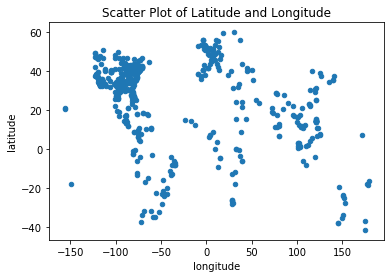

In [162]:
_ = virus_data.plot.scatter(
    x="longitude", y="latitude", title="Scatter Plot of Latitude and Longitude"
)

In [164]:
virus_data.to_csv('data/processed_headlines_locations.csv')